<a href="https://colab.research.google.com/github/subhashpolisetti/apache-beam-and-eda-projects/blob/main/%E2%80%8Eauto-eda-analysis/Netflix_EDA_with_Sweetviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Dataset Analysis Using Sweetviz**

## **Overview**
This notebook performs an exploratory data analysis (EDA) on the Netflix Movies and TV Shows dataset using Sweetviz. The steps include:

1. **Setup Kaggle API**: Configure and download the dataset.
2. **Data Preparation**: Load and inspect the data for structure and missing values.
3. **Auto EDA**: Generate a detailed Sweetviz report.
4. **Save Report**: Save the report directly to Google Drive.
5. **Visualizations**: Optional custom insights with Matplotlib/Seaborn.

## **Tools Used**
- **Kaggle API**: For downloading the dataset.
- **Sweetviz**: For generating an automated EDA report.
- **Pandas**: For data inspection and manipulation.
- **Matplotlib/Seaborn**: For additional visualizations.

## **Dataset Description**
The dataset contains metadata on Netflix Movies and TV Shows:
- **Type**: Movie or TV Show.
- **Title**: Name of the content.
- **Director**: Director of the content (if available).
- **Cast**: Main actors/actresses.
- **Country**: Country of origin.
- **Release Year**: Year the content was released.
- **Rating**: Maturity rating (e.g., PG-13, R).
- **Duration**: Length in minutes or seasons.
- **Genre**: Category or genre.

## **Output**
The Sweetviz report (`Netflix_Analysis.html`) includes:
- Feature distributions, correlations, and statistics.
- Missing value analysis and visual summaries.

## **Next Steps**
Use this analysis to explore trends, build predictive models, or cluster content based on features.


In [5]:
from google.colab import files

# Step 1: Upload Kaggle API token
print("Please upload your kaggle.json file (API token from Kaggle):")
files.upload()  # Prompt to upload kaggle.json

# Step 2: Configure Kaggle API
# Create Kaggle directory and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download Netflix Movies and TV Shows dataset
!kaggle datasets download -d shivamb/netflix-shows

# Step 4: Extract the downloaded dataset
!unzip netflix-shows.zip -d ./netflix_data/

# Step 5: Confirmation
print("Netflix Movies and TV Shows dataset downloaded and extracted successfully!")


Please upload your kaggle.json file (API token from Kaggle):


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 128MB/s]
Archive:  netflix-shows.zip
  inflating: ./netflix_data/netflix_titles.csv  
Netflix Movies and TV Shows dataset downloaded and extracted successfully!


In [6]:

import pandas as pd

# Load the Netflix dataset
df = pd.read_csv('./netflix_data/netflix_titles.csv')

# Display basic dataset information
print("Dataset Shape:", df.shape)
print("\nColumns in the dataset:", df.columns)
print("\nFirst few rows of the dataset:")
display(df.head())


Dataset Shape: (8807, 12)

Columns in the dataset: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

First few rows of the dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [8]:
!pip install sweetviz
import sweetviz as sv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 57.0 MB/s eta 0:00:00


In [16]:
# Mount Google Drive to Colab environment
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import sweetviz as sv



# Analyze the dataset and create the report
report = sv.analyze(df)

# Set the path to save in Google Drive
drive_path = '/content/drive/MyDrive/Netflix_Analysis.html' # Corrected path: 'MyDrive' instead of 'My Drive'

# Save the Sweetviz report to the specified path
report.show_html(drive_path, open_browser=False)

print(f"Report saved to: {drive_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/Netflix_Analysis.html was generated.
Report saved to: /content/drive/MyDrive/Netflix_Analysis.html


# Visualize Key Insights

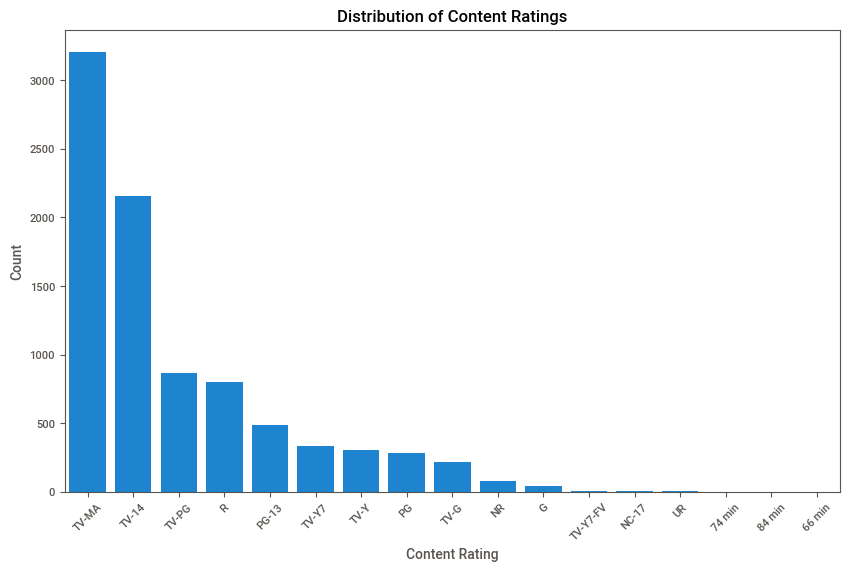

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of content ratings
ratings_counts = df['rating'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=ratings_counts.index, y=ratings_counts.values)
plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


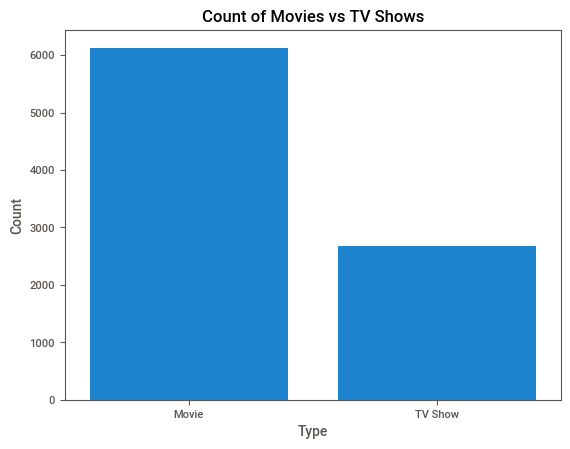

In [13]:
# Count plot for type (Movie vs TV Show)
sns.countplot(data=df, x='type')
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


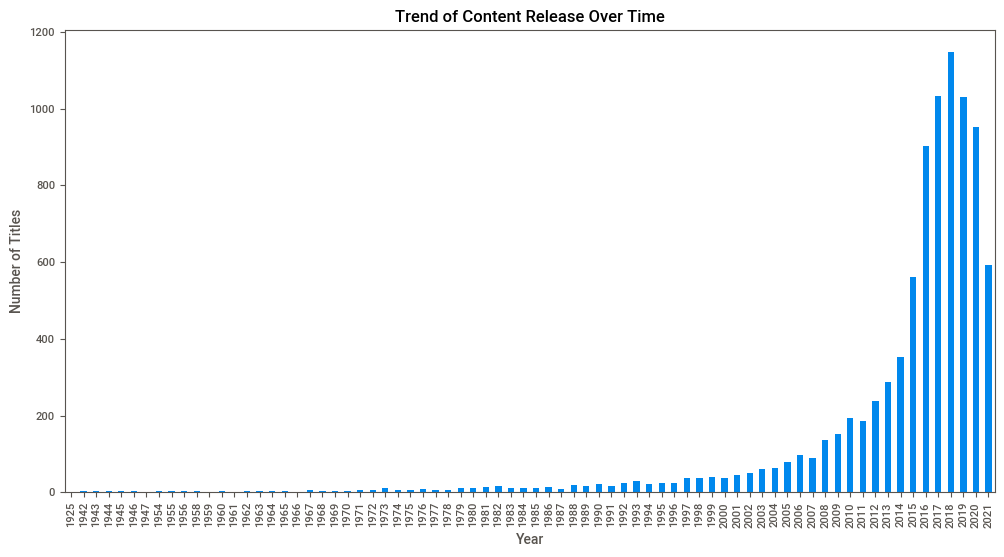

In [14]:
# Convert release_year to datetime and plot
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
content_trend = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
content_trend.plot(kind='bar')
plt.title('Trend of Content Release Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()
